# Multivariate Linear Regression

---

## Multiple Features

- ##### Notation

  - **n**	:	number of features
  - **m** = number of training examples
  - **x<sup>i</sup>** = input (features) of i<sup>th</sup> training examples
  - **x<sub>j</sub><sup>i</sup>** = value of feature j in i<sup>th</sup> training examples

| <center>Size<br>x<sub>1</sub></center> | <center>Number of<br>bedrooms<br>x<sub>2</sub></center> | <center>Number of<br>floors<br>x<sub>3</sub></center> | <center>Age of<br>home<br>x<sub>4</sub></center> | <center>Price<br>y</center> |
| :-------------------: | :------------------------------------: | :----------------------------------: | :-----------------------------: | :--------: |
|         <center>2104</center>          |                   <center>5</center>                    |                  <center>1                   |               <center>45</center>                |    <center>460</center>     |
|         <center>1416</center>          |                   <center>3</center>                    |                  <center>2                   |               <center>40</center>                |    <center>232</center>     |
|         <center>1534</center>          |                   <center>3</center>                    |                  <center>2                   |               <center>30</center>                |    <center>315</center>     |
|          ...          |                  ...                   |                 ...                  |               ...               |    ...     |

  - E.g.
      - x<sup>(2)</sup> = $ \begin{bmatrix} 1416 \\\ 3 \\\ 2 \\\ 40 \end{bmatrix} \qquad$   x<sup>(3)</sup> = $ \begin{bmatrix} 1534 \\\ 3 \\\ 2 \\\ 30 \end{bmatrix}$
  
  <br><br>
  
  
- ### Hypothesis

    - #### H<sub>&theta;</sub>(x) = &theta;<sup>T</sup>x = &theta;<sub>0</sub>x<sub>0</sub> +  &theta;<sub>1</sub>x<sub>1</sub> +  &theta;<sub>2</sub>x<sub>2</sub> + &middot;&middot;&middot; +  &theta;<sub>n</sub>x<sub>n</sub>

    - For convenience of notation, define x<sub>0</sub> = 1 (x<sub>0</sub><sup>(i)</sup> = 1) 

        <br>

        - $ x = \begin{bmatrix} x_0 \\\ x_1 \\\ x_2 \\\ \cdot  \\\ \cdot \\\ \cdot \\\ x_n \end{bmatrix} \qquad \theta =  \begin{bmatrix} \theta_0 \\\ \theta_1 \\\ \theta_2 \\\ \cdot  \\\ \cdot \\\ \cdot \\\ \theta_n \end{bmatrix} $

        <br>

  - H<sub>&Theta;</sub>(x) : multivariate linear regression
      - x :  n + 1 dimensional vector
      - &theta; : n + 1 dimensional vector
      <br><br>


- ### Cost Function

    - $ J(\theta) = {1\over 2m}{\sum_{i=1}^m } $(H<sub>&theta;</sub>(x<sup>(i)</sup>) - y<sup>(i)</sup>)<sup>2</sup> $ \; = \; {1\over 2m}{\sum_{i=1}^m } $( &theta;<sup>T</sup>x<sup> (i)</sup> - y<sup> (i)</sup> )<sup>2</sup>

    $\qquad\quad\;\;  = {1\over 2m}{\sum_{i=1}^m }(( \sum_{j=0}^n$ &theta;<sub>j </sub>x<sub>j</sub><sup>(n)</sup> ) - y<sup>(i)</sup> )<sup>2</sup>

- ### Gradient Descent
    $\quad$\- **simultaneously update** for every j = 0,1,2, $\cdots$,n

   - $\theta_j := \theta_j - \alpha{\delta\over \delta\theta_j}J(\theta)$<br>
$\quad\;\; = \theta_j - \alpha{1 \over m}{\sum_{i=1}^m } $(H<sub>&theta;</sub>(x<sup>(i)</sup>) - y<sup>(i)</sup>)x<sub>j</sub><sup>(i)</sup>

   - E.g.
        - $\theta_0 := \theta_0 - \alpha{1 \over m}{\sum_{i=1}^m } $(H<sub>&theta;</sub>(x<sup>(i)</sup>) - y<sup>(i)</sup>)x<sub>0</sub><sup>(i)</sup>
        - $\theta_1 := \theta_1 - \alpha{1 \over m}{\sum_{i=1}^m } $(H<sub>&theta;</sub>(x<sup>(i)</sup>) - y<sup>(i)</sup>)x<sub>1</sub><sup>(i)</sup>

#### Example

|  X1  |  X2  |  X3  |  Y   |
| :--: | :--: | :--: | :--: |
|  73  |  80  |  75  | 152  |
|  93  |  88  |  93  | 185  |
|  89  |  91  |  90  | 180  |
|  96  |  98  | 100  | 196  |
|  73  |  66  |  70  | 142  |

### No Matrix
   - use tensorflow

In [113]:
import tensorflow as tf

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='w1')
w2 = tf.Variable(tf.random_normal([1]), name='w2')
w3 = tf.Variable(tf.random_normal([1]), name='w3')
b = tf.Variable(tf.random_normal([1]), name='b')

# hypothesis
hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

# cost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# gradient descent algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001)
train = optimizer.minimize(cost)

# Training Start

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 200 == 0:
        print(step, "\tCost: ", cost_val, "\thypothesis: ", hy_val)

0 	Cost:  18700.41 	hypothesis:  [37.321842 33.874836 39.01619  43.31214  22.324919]
200 	Cost:  29.780298 	hypothesis:  [158.13188 179.8746  182.45952 199.55399 133.85434]
400 	Cost:  26.859913 	hypothesis:  [157.73361 180.14873 182.3389  199.45581 134.22328]
600 	Cost:  24.23846 	hypothesis:  [157.35661 180.40826 182.22476 199.3624  134.57304]
800 	Cost:  21.885168 	hypothesis:  [156.99974 180.654   182.1168  199.27351 134.90465]
1000 	Cost:  19.772354 	hypothesis:  [156.66193 180.8867  182.0147  199.18889 135.21907]
1200 	Cost:  17.87556 	hypothesis:  [156.3422  181.107   181.91809 199.10835 135.5172 ]
1400 	Cost:  16.17256 	hypothesis:  [156.03952 181.31552 181.8267  199.0316  135.79982]
1600 	Cost:  14.643259 	hypothesis:  [155.75305 181.51297 181.74028 198.95851 136.06787]
1800 	Cost:  13.270025 	hypothesis:  [155.48195 181.69989 181.65857 198.88889 136.32207]
2000 	Cost:  12.036756 	hypothesis:  [155.22537 181.87686 181.5813  198.82253 136.56313]


### Use Matrix

Text(0.5,1,'cost function')

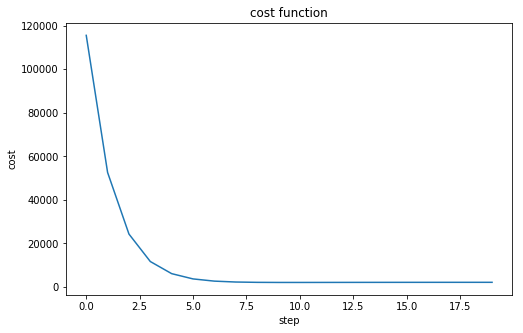

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.array([[73., 80., 75., 152.],
                 [93., 88., 93., 185.], 
                 [89., 91., 90., 180.], 
                 [96., 98., 100., 196.],
                 [73., 66., 70., 142.]])

X = np.array(data[:,:-1])  # [None, 3]
Y = np.array(data[:, -1])  # [None, 1]

# np.random.normal(평균, 표준편차, 배열크기)
W = np.random.normal(0, 2, (3, 1))
b = np.random.normal(0, 2, (1))

learning_rate = 1e-6   # alpha
step_cnt = 20

m = len(X)  # training example Cnt

plt_step = np.zeros(step_cnt)
plt_cost = np.zeros(step_cnt)

# H(x)
for step in range(0, step_cnt):
    hypothesis = np.add(np.dot(X, W), b)
    
    cost = np.dot(1/(2*m), np.sum(np.square(np.subtract(hypothesis, Y))))

    plt_step[step] = step
    plt_cost[step] = cost
    
    W_gradient = learning_rate * 1/m * np.sum(np.dot(np.subtract(hypothesis, Y), X))
    b_gradient = learning_rate * 1/m * np.sum(np.subtract(hypothesis, Y))
    
    W = np.subtract(W, W_gradient)
    b = np.subtract(b, b_gradient)
    
    
plt.figure(figsize=(8, 5))
plt.plot(plt_step, plt_cost)
plt.xlabel('step')
plt.ylabel('cost')
plt.title('cost function')

- use tensorflow

Text(0.5,1,'cost function')

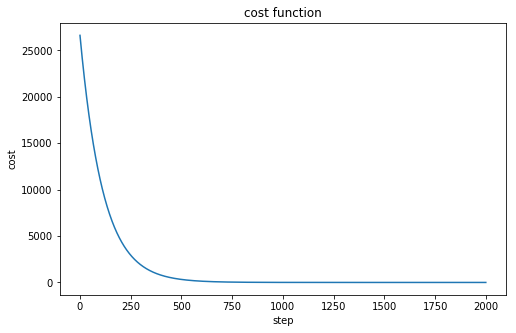

In [107]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

x_data = [[73, 80, 75],
          [93, 88, 93], 
          [89, 91, 90], 
          [96, 98, 100],
          [73, 66, 70]]

y_data = [[152],
          [185],
          [180],
          [196],
          [142]]

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='Weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

step_cnt = 2001
plt_step = np.zeros(step_cnt)
plt_cost = np.zeros(step_cnt)

# hypothesis
hypothesis = tf.matmul(X, W) + b

# cost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# gradient descent algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-7)
train = optimizer.minimize(cost)

# Training Start

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(step_cnt):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    plt_step[step] = step
    plt_cost[step] = cost_val
    
    '''
    if step % 200 == 0:
        print(step, "\tCost: ", cost_val, "\nPrediction:\n", hy_val, "\n")
    '''
    
plt.figure(figsize=(8, 5))
plt.plot(plt_step, plt_cost)
plt.xlabel('step')
plt.ylabel('cost')
plt.title('cost function')

## Feature Scaling

- ### Feature Scaling

  - Need to speed up for find global optimum

  - Idea : Make sure features are on a **similar scale** (approximately)

    - if each feature are **similar scale**, to find more easier

  - $ x_i = {x_i \over (maxScale - minScale)} $

  - E.g.

    - x<sub>1</sub> = size ( 0 - 2000 feet<sup>2</sup>)
    - x<sub>2</sub> = number of bedrooms
    - //todo : draw graph

    

  - range : $ -1 \le x_i \le 1 $

  - $x_i$ 가 정확히 -1, 1 사이에 존재할 필요 없음

  - **approximately same scale** of all features is ok
  - E.g
      - $ 0 \le x_i \le 3 $	    ( o )
      - $ -2 \le x_i \le 0.5 $   ( o )
      - $ -100 \le x_i \le 100 $ ( x ) too big
      - $ -0.0001 \le x_i \le 0.0001 $ (x)  too small
      - Andrew ng professor say, $ -3 \sim 3, {-1\over 3} \sim {1\over 3} $ is fine

## Mean normalization

- #### Replace $x_i$ with $x_i - \mu _i$ to make features have approximately zero mean (Do not apply to $x_0$ = 1)


  - **$x_i = {x_i - \mu_i \over s_i}$**

    - $\mu _i$ : average value of $x_i$ in training set

    - $s_i$ : value of range ( $maxx_i - minx_i$) or standard deviation
    

  - **E.g.** 

    - -1000 $\leq x_1 \leq$ 2000 ( $x$ = [-1000, 200, 1000, 2000] )

    - $x_1 = {x_1 - 1100 \over 3000}$

      

## Computing Prarameters Analytically

### Normal Equation

- Method to solve for $\theta$ **analytically**

- **No need to many iterations, we find optimum at once**

  - $\theta = (X^TX)^{-1}X^TY$

- **No need to do feature scaling**

  - some linear regression problems will give us a much better way 

  - to solve for the optimal value of the parameters $\theta$

    

- **Design matrix** (계획 행렬)

  - 독립 변수를 묶어둔 행렬
    - ex. 
      - $ x =  \begin{bmatrix} 1 & a \\\\  1 & b \\\\ 1 & c \\\\ 1 & d \end{bmatrix}$ 

- 기본 데이터에 새로운 데이터 $x_0$ = 1 을 넣어 행렬 X를 만듬

- Features

|    <center>Gradient Descent</center>     |      <center>Normal Equation</center>       |
| :---------------------: | :------------------------: |
| <center>Need to choose $\alpha$</center> | <center>No need to choose $\alpha$</center> |
|  <center>Needs many iterations</center>  |     <center>No need to iterate</center>     |
|        <center>$O(kn^2)$</center>        |          <center>$O(n^3)$</center>          |
| <center>works well when n large</center> |   <center>slow if n is ver large</center>   |

  - According to normal equation's time complexity, normal equation usually use n < 1000 ( my opinion )